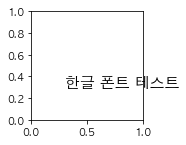

In [1]:
import os 
import datatable
import pandas as pd
import numpy as np
import openpyxl
import math
import datetime as dt
from sklearn.metrics import mean_squared_error
import math
import warnings
warnings.filterwarnings('ignore')


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, mean_squared_error, confusion_matrix, plot_confusion_matrix
#from keras.models import Sequential
#from keras.layers import Dense, Activation

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier



def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    print('confusion matrix:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(f1))
    print('AUC: {:.4f}'.format(auc))
    
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False


## Test
plt.figure(figsize=(2,2))
plt.text(0.3, 0.3, '한글 폰트 테스트', size=15)
plt.show()

In [2]:
train=pd.read_csv('/Users/baeknarim/데이터분석분야_퓨처스부문_포포나무팀/추가제출파일/DATA/전처리데이터/병합완료/train_exog.csv')
test=pd.read_csv('/Users/baeknarim/데이터분석분야_퓨처스부문_포포나무팀/추가제출파일/DATA/전처리데이터/병합완료/test_exog.csv')

In [3]:

train2=train.copy()
test2=test.copy()
print(train2.shape)
print(test2.shape)

(10264349, 92)
(3255482, 92)


In [4]:
print(train2.isna().sum().sum())
print(test2.isna().sum().sum())

0
3255482


In [5]:
pd.set_option('display.max_columns', 100)
train2.head()


,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,isjob,loanapply_insert_time_s,bank_cumcnt,bank_popularity,product_cumcnt,product_popularity,bank_group,product_group,age,대출총괄_mo,대출총괄_pc,주택관련대출_mo,주택관련대출_pc,자동차대출_mo,자동차대출_pc,대환대출_mo,대환대출_pc,핀다대출외서비스_mo,핀다대출외서비스_pc,mp_os,Session,how_long,visit_cumsum,from_last_visit,visit_rate,session_sum,session_avg,before_apply_count,before_7days,before_30days,event_count1,event_group1,connect_time_s,from_last_visit_time_s,Error2,OpenApp,GetCreditInfo,UseLoanManage,UsePrepayCalc,StartLoanApply,ViewLoanApplyIntro,CompleteIDCertification,EndLoanApply,Login,SignUp,UseDSRCalc,Error,insert_time_month,insert_time_day,insert_time_hour,insert_time_weekday,insert_time_timezone,company_enter_month_year,company_enter_month_month,is_holiday,insert_time_weekday_sin,insert_time_weekday_cos,cofix,CPI,CPI_lag1,insert_time_diff,application_id_cnt,diff_amount,more_loan_desired,loan_limit_outlier,first_confirmed,loan_income_ratio,loan_rate_rank,loan_limit_rank
0,566528,2022-03-01 00:11:36,13,123,20000000.0,19.1,0,681184,1974.0,1.0,2022-03-01 00:11:35,580.0,8000000.0,OTHERINCOME,0.0,기타,전월세,1000000.0,LIVING,no_response,no_response,4.0,20000000.0,0,87096,1,0.000000,1,0.0,4.0,6.0,49.0,18.70047,15.23178,35.41996,40.39735,5.86370,4.63576,3.64500,2.64900,7.21077,11.25827,Android,1.0,1,0.0,0.0,0.0,0.0,0.0,0,0,0,22,6,540,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1,dawn_not1,0.0,0,True,0.866025,0.5,1.57,106.06,105.3,1.0,1,-19000000.0,True,False,True,2.50,1.0,1.0
1,38545,2022-03-01 00:14:15,55,12,27000000.0,16.4,0,477093,1971.0,0.0,2022-03-01 00:14:14,650.0,40000000.0,OTHERINCOME,0.0,기타,기타가족소유,4000000.0,LIVING,no_response,no_response,6.0,30000000.0,0,87255,7,0.000000,2,0.0,5.0,7.0,52.0,21.48541,13.75000,44.42970,45.00000,6.36604,6.25000,1.85676,0.00000,6.76392,7.50000,Android,1.0,1,0.0,0.0,0.0,0.0,0.0,0,0,0,6,1,139,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1,dawn_not1,0.0,0,True,0.866025,0.5,1.57,106.06,105.3,1.0,1,-23000000.0,True,False,True,0.75,1.0,1.0
2,182468,2022-03-01 00:15:52,35,29,3000000.0,17.9,0,92495,1980.0,0.0,2022-03-01 00:15:51,700.0,30000000.0,OTHERINCOME,0.0,기타,기타가족소유,30000000.0,SWITCHLOAN,no_response,no_response,3.0,27000000.0,0,87352,24,0.041667,7,0.0,5.0,6.0,43.0,24.83480,10.08771,48.12775,36.40350,4.90088,3.94736,3.52422,1.75438,6.22246,14.03508,Android,1.0,1,0.0,0.0,0.0,0.0,0.0,0,0,0,3,4,188,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1,dawn_not1,0.0,0,True,0.866025,0.5,1.57,106.06,105.3,1.0,10,27000000.0,False,False,False,0.90,8.0,2.0
3,182468,2022-03-01 00:15:52,55,12,20000000.0,13.0,0,92495,1980.0,0.0,2022-03-01 00:15:51,700.0,30000000.0,OTHERINCOME,0.0,기타,기타가족소유,30000000.0,SWITCHLOAN,no_response,no_response,3.0,27000000.0,0,87352,9,0.000000,3,0.0,5.0,7.0,43.0,24.83480,10.08771,48.12775,36.40350,4.90088,3.94736,3.52422,1.75438,6.22246,14.03508,Android,1.0,1,0.0,0.0,0.0,0.0,0.0,0,0,0,3,4,188,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1,dawn_not1,0.0,0,True,0.866025,0.5,1.57,106.06,105.3,1.0,10,10000000.0,False,False,False,0.90,2.0,7.0
4,182468,2022-03-01 00:15:52,14,128,6000000.0,14.9,0,92495,1980.0,0.0,2022-03-01 00:15:51,700.0,30000000.0,OTHERINCOME,0.0,기타,기타가족소유,30000000.0,SWITCHLOAN,no_response,no_response,3.0,27000000.0,0,87352,8,0.125000,4,0.0,5.0,7.0,43.0,24.83480,10.08771,48.12775,36.40350,4.90088,3.94736,3.52422,1.75438,6.22246,14.03508,Android,1.0,1,0.0,0.0,0.0,0.0,0.0,0,0,0,3,4,188,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1,dawn_not1,0.0,0,True,0.866025,0.5,1.57,106.06,105.3,1.0,10,24000000.0,False,False,False,0.90,4.0,3.0


In [6]:
print(train2["insert_time_month"].value_counts())
print(test2["insert_time_month"].value_counts())

3    3577317
2    3426207
1    3260825
Name: insert_time_month, dtype: int64
4    3255482
Name: insert_time_month, dtype: int64


In [7]:
pd.set_option('display.max_rows', 200)
train2.dtypes

application_id                           int64
loanapply_insert_time                   object
bank_id                                  int64
product_id                               int64
loan_limit                             float64
loan_rate                              float64
is_applied                               int64
user_id                                  int64
birth_year                             float64
gender                                 float64
insert_time                             object
credit_score                           float64
yearly_income                          float64
income_type                             object
company_enter_month                    float64
employment_type                         object
houseown_type                           object
desired_amount                         float64
purpose                                 object
personal_rehabilitation_yn              object
personal_rehabilitation_complete_yn     object
existing_loan

In [8]:
train3=train2.drop(["application_id","loanapply_insert_time","product_id","insert_time","bank_id",
                "user_id",'loanapply_insert_time_s','insert_time_weekday_sin','insert_time_weekday_cos'],axis=1)

test3=test2.drop(["application_id","loanapply_insert_time","product_id","insert_time","bank_id",
                "user_id",'loanapply_insert_time_s','insert_time_weekday_sin','insert_time_weekday_cos'],axis=1)



In [9]:
print(train3["personal_rehabilitation_yn"].value_counts())
print(test3["personal_rehabilitation_yn"].value_counts())


no_response    5870410
0.0            4346618
0.0              24301
1.0              22745
1.0                275
Name: personal_rehabilitation_yn, dtype: int64
0.0            2969001
0.0             252861
1.0              17066
no_response      15463
1.0               1091
Name: personal_rehabilitation_yn, dtype: int64


In [10]:
train3.loc[train3["personal_rehabilitation_yn"]==0.0,"personal_rehabilitation_yn"]="0"
train3.loc[train3["personal_rehabilitation_yn"]==1.0,"personal_rehabilitation_yn"]="1"
train3.loc[train3["personal_rehabilitation_yn"]=="0.0","personal_rehabilitation_yn"]="0"
train3.loc[train3["personal_rehabilitation_yn"]=="1.0","personal_rehabilitation_yn"]="1"


test3.loc[test3["personal_rehabilitation_yn"]==0.0,"personal_rehabilitation_yn"]="0"
test3.loc[test3["personal_rehabilitation_yn"]==1.0,"personal_rehabilitation_yn"]="1"
test3.loc[test3["personal_rehabilitation_yn"]=="0.0","personal_rehabilitation_yn"]="0"
test3.loc[test3["personal_rehabilitation_yn"]=="1.0","personal_rehabilitation_yn"]="1"



print(train3["personal_rehabilitation_yn"].value_counts())
print(test3["personal_rehabilitation_yn"].value_counts())



no_response    5870410
0              4370919
1                23020
Name: personal_rehabilitation_yn, dtype: int64
0              3221862
1                18157
no_response      15463
Name: personal_rehabilitation_yn, dtype: int64


In [11]:
train4 = pd.get_dummies(data = train3, columns = ["gender",'income_type','employment_type','houseown_type','purpose',
                                             'personal_rehabilitation_yn','personal_rehabilitation_complete_yn',
                                              'bank_group','product_group','event_count1','mp_os','insert_time_timezone'])


test4 = pd.get_dummies(data = test3, columns = ["gender",'income_type','employment_type','houseown_type','purpose',
                                             'personal_rehabilitation_yn','personal_rehabilitation_complete_yn',
                                              'bank_group','product_group','event_count1','mp_os','insert_time_timezone'])
print(train4.shape)
print(test4.shape)

(10264349, 122)
(3255482, 122)


In [12]:
pd.set_option('display.max_rows', 200)
print(train4.isna().sum())

loan_limit                                               0
loan_rate                                                0
is_applied                                               0
birth_year                                               0
credit_score                                             0
yearly_income                                            0
company_enter_month                                      0
desired_amount                                           0
existing_loan_cnt                                        0
existing_loan_amt                                        0
isjob                                                    0
bank_cumcnt                                              0
bank_popularity                                          0
product_cumcnt                                           0
product_popularity                                       0
age                                                      0
대출총괄_mo                                                 

In [13]:
pd.set_option('display.max_rows', 200)
print(test4.isna().sum())

loan_limit                                                     0
loan_rate                                                      0
is_applied                                               3255482
birth_year                                                     0
credit_score                                                   0
yearly_income                                                  0
company_enter_month                                            0
desired_amount                                                 0
existing_loan_cnt                                              0
existing_loan_amt                                              0
isjob                                                          0
bank_cumcnt                                                    0
bank_popularity                                                0
product_cumcnt                                                 0
product_popularity                                             0
age                      

In [14]:
test4 = test4.reindex(columns = train4.columns, fill_value=0)
print(train4.shape)
print(test4.shape)

(10264349, 122)
(3255482, 122)


In [15]:
print(train4['is_applied'].value_counts(normalize=True))

0    0.945958
1    0.054042
Name: is_applied, dtype: float64


# random sampling sampling_strategy = 0.2

In [16]:
#validation은 undersampling하지말고, 진짜 train만 undersampling하자


#index split

from sklearn.model_selection import train_test_split

train, valid = train_test_split(train4,test_size = 0.3,shuffle = True, random_state = 42)



from imblearn.under_sampling import RandomUnderSampler

X_train = train.drop('is_applied', axis = 1)
y_train = train['is_applied']

X_valid = valid.drop('is_applied', axis = 1)
y_valid = valid['is_applied']

rus = RandomUnderSampler(sampling_strategy = 0.2, random_state = 0) 
X_train, y_train = rus.fit_resample(X_train, y_train)

print(y_train.value_counts(normalize=True))  #resample이 들어감
print(y_valid.value_counts(normalize=True))   #validation set: NOT_RESAMPLE

# random state 제거한 후, 5번 진행한 결과, 모델링 결과값이 동일하다. 즉 random하게 샘플을 제거하는 부분의 risk를 걱정하지 않앋
print(X_train.shape)
print(X_valid.shape)

0    0.833333
1    0.166667
Name: is_applied, dtype: float64
0    0.946086
1    0.053914
Name: is_applied, dtype: float64
(2332152, 121)
(3079305, 121)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

model = LogisticRegression()
model.fit(X_train, y_train)



TypeError: __init__() got multiple values for argument 'n_splits'

In [18]:
predict1= model.predict(X_valid)

print('accuracy_score: ',accuracy_score(y_valid, predict1))
print('f1_score: ', f1_score(y_valid, predict1))

print(print(get_clf_eval(y_valid,predict1)))



accuracy_score:  0.9280792256694287
f1_score:  0.4095499626746294
confusion matrix:
 [[2781032  132254]
 [  89212   76807]]

정확도: 0.9281
정밀도: 0.3674
재현율: 0.4626
F1: 0.4095
AUC: 0.7086
None
None
